In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy.integrate import odeint
sns.set()
%matplotlib inline

In [3]:
t = 0;dt = 0.001; s4 = 0;
ci= 0 
s5=0.7; factive=0.2; s7=0.01; s6=1-factive-s7-s4;
tnow =[]
ixnow = []
F1=[]
F2=[]
F3=[]
F4=[]
for i in range(1,500000+1):
    t = t + dt
    ni = 0
    if t>30 and t<80:
        ni = 100
        ci = 0.3
    if t>130 and t<180:
        ni = 100
        ci = 2
    if t>230 and t<280:
        ni = 100
        ci = 3
    if t>330 and t<380:
        ni = 100
        ci = 10
    if t>430 and t<480:
        ni = 100
        ci = 60
    #if t>530 and t<580:
        #ni = 100
        #ci = 60
    #if t>630 and t<680:
        #ni = 100
        #ci = 60
    #if t>730 and t<780:
        #ni = 0
        #ci = 2
    #if t>280 and t<310:
        #ni = 100
        #ci = 0
    #if t>310 and t<340:
        #ni = 0
        #ci = 0
    #if t>340 and t<370:
        #ni = 100
        #ci = 0
    #if t>370 and t<400:
        #ni = 0
        #ci = 0
    #if t>400 and t<430:
        #ni = 100
        #ci = chi
    #if t>430 and t<460:
        #ni = 0
        #ci = 0
        
        
    f3n=ni**2.5/(ni**2.5+17**2.5)
    kcon1=0.1
    kcoff1=0.05
    kcon2=20 
    kcoff2=0.3
    kinact=0.2
    #kinact=1
    #kinact=0.001 
    #kinact=1
    #kinact=0.2
    
    s5=s5+ (s6*ci*kcon1-s5*kcoff1+factive*f3n*kinact-s5*0.3) *dt
    factive=factive+(s7*ci*kcon2-factive*kcoff2+s5*0.15-factive*f3n*kinact)*dt
    s7=s7+(factive*kcoff2+s6*0.1-s7*ci*kcon2-s7*f3n*kinact*25)*dt
    s6=1-s5-factive-s7
    
    F1.append(s5)
    F2.append(factive)
    F3.append(s7)
    F4.append(s6)
    
    incx=factive*f3n
    tnow.append(t)
    ixnow.append(incx)


In [4]:
# Data frame for the data extract
df = pd.DataFrame()
df['time'] = tnow
df['current'] = ixnow

In [5]:
df.shape

(500000, 2)

In [6]:
k=0
T =[]
I =[]
for t,i in zip(df['time'],df['current']):
    if k%100 == 0:
        T.append(t)
        I.append(i)
    k = k+1

In [7]:
len(T)

5000

In [8]:
df = pd.DataFrame()
df['time'] = T
df['current'] = I

In [9]:
df.to_csv("output/Ca_regulation1.csv")

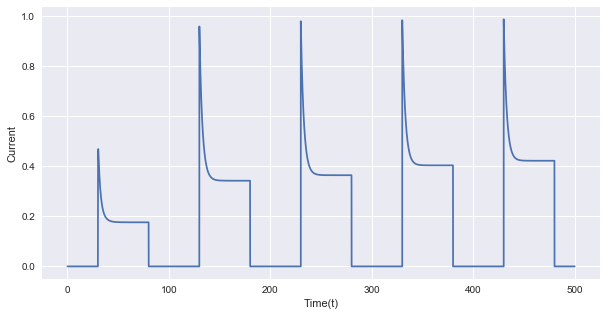

In [10]:
plt.figure(figsize = [10,5])
plt.plot(tnow,ixnow)
plt.xlabel("Time(t)")
plt.ylabel("Current")
plt.savefig("plot/Ca_current.png")
plt.savefig("plot/Ca_current.pdf")
plt.show()

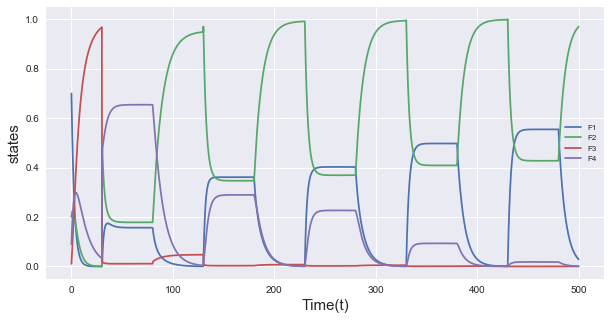

In [11]:
plt.figure(figsize = [10,5])
plt.plot(tnow,F1,label = "F1")
plt.plot(tnow,F2,label = "F2")
plt.plot(tnow,F3,label="F3")
plt.plot(tnow,F4,label="F4")
plt.xlabel("Time(t)",fontsize=15)
plt.ylabel("states",fontsize=15)
#plt.xticks([i*30 for i in range(10)])
plt.legend(fontsize = 8)
plt.savefig("plot/Ca_states.png")
plt.savefig("plot/Ca_states.pdf")
plt.show()